# A tutorial for the richdem Python package

This notebook demonstrates the usage of the **richdem** Python package for geospatial analysis.

* GitHub repo: https://github.com/giswqs/richdem-binder
* richdem: https://github.com/r-barnes/richdem

**Launch this tutorial in an interactive cloud environment:**

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/giswqs/richdem-binder/master)

[![Binder](https://binder.pangeo.io/badge.svg)](https://binder.pangeo.io/v2/gh/giswqs/richdem-binder/master)

## Table of Content

* [Installation](#Installation)
* [Getting data](#Getting-data)
    * [Getting data from direct URLs](#Getting-data-from-direct-URLs) 
    * [Getting data from Google Drive](#Getting-data-from-Google-Drive)
* [Using richdem](#Using-richdem)
    * [Checking GDAL](#Checking-GDAL)
    * [Loading data](#Loading-data)
    * [Depression filling](#Depression-filling)

## Installation


The **richdem** Python package can be installed using the following command:

`pip install richdem`

If you have installed **richdem** Python package before and want to upgrade to the latest version, you can use the following command:

`pip install richdem -U`

## Getting data

This section demonstrates two ways to get data into Binder so that you can test the **richdem** Python package in the cloud using your own data. We will use the [pygis](https://github.com/giswqs/pygis) Python package to download data into Binder

* [Getting data from direct URLs](#Getting-data-from-direct-URLs) 
* [Getting data from Google Drive](#Getting-data-from-Google-Drive)

### Getting data from direct URLs

If you have data hosted on your own HTTP server or GitHub, you should be able to get direct URLs. With a direct URL, users can automatically download the data when the URL is clicked. For example https://github.com/giswqs/lidar/raw/master/examples/lidar-dem.zip

Import the following Python libraries and start getting data from direct URLs.

In [1]:
import os
import pygis

Create a folder named *data* and set it as the working directory.

In [2]:
root_dir = os.getcwd()
work_dir = os.path.join(root_dir, 'data')
if not os.path.exists(work_dir):
    os.mkdir(work_dir)
print("Working directory: {}".format(os.path.realpath(work_dir)))

Working directory: /home/jovyan/examples/data


Replace the following URL with your own direct URL hosting the data you would like to use.

In [3]:
url = "https://github.com/giswqs/lidar/raw/master/examples/lidar-dem.zip"

Download data the from the above URL and unzip the file if needed.

In [4]:
pygis.download_from_url(url, out_dir=work_dir)

Unzipping lidar-dem.zip ...
Unzipping done.
Data directory: /home/jovyan/examples/data/lidar-dem


You have successfully downloaded data to Binder. Therefore, you can skip to [Using richdem](#Using-richdem) and start testing **richdem** with your own data. 

### Getting data from Google Drive

Alternatively, you can upload data to [Google Drive](https://www.google.com/drive/) and then [share files publicly from Google Drive](https://support.google.com/drive/answer/2494822?co=GENIE.Platform%3DDesktop&hl=en). Once the file is shared publicly, you should be able to get a shareable URL. For example, https://drive.google.com/file/d/1c6v-ep5-klb2J32Nuu1rSyqAc8kEtmdh.

**Replace the following URL with your own shareable URL from Google Drive.**

In [5]:
gfile_url = 'https://drive.google.com/file/d/1c6v-ep5-klb2J32Nuu1rSyqAc8kEtmdh'

**Download the shared file from Google Drive.**

In [6]:
pygis.download_from_gdrive(gfile_url, file_name='lidar-dem.zip', out_dir=work_dir)

Google Drive file id: 1c6v-ep5-klb2J32Nuu1rSyqAc8kEtmdh
Unzipping...Done.


You have successfully downloaded data from Google Drive to Binder. You can now continue to [Using richdem](#Using-richdem) and start testing **richdem** with your own data. 

## Using richdem

* [Checking GDAL](#Checking-GDAL)
* [Loading data](#Loading-data)
* [Depression filling](#Depression-filling)

### Checking GDAL

The **LoadGDAL** function in richdem requires GDAL, so let's first make sure GDAL has been installed in the system.

In [7]:
import os
print(os.popen('gdalinfo --version').read().rstrip())

GDAL 2.3.2, released 2018/09/21


### Loading data

More information about loading data in richdem can be found [here](https://richdem.readthedocs.io/en/latest/loading_data.html).

In [8]:
import richdem as rd
beau = rd.LoadGDAL('data/lidar-dem/dem.tif')

### Depression filling

Depressions, otherwise known as pits, are areas of a landscape wherein flow ultimately terminates without reaching an ocean or the edge of a digital elevation model.

More information about depression-filling can be found on [richdem.readthedocs.io](https://richdem.readthedocs.io/en/latest/depression_filling.html)

#### Original DEM

For reference, the original DEM appears as follows:

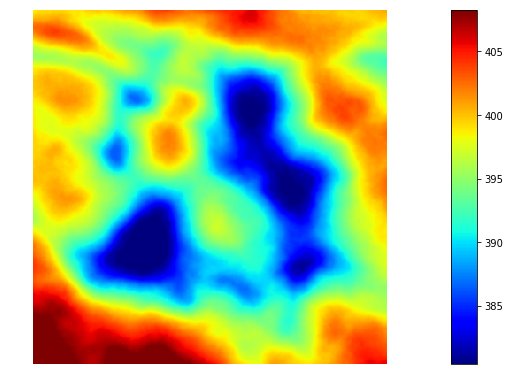

In [9]:
%matplotlib inline
beaufig = rd.rdShow(beau, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

#### Complete Filling

Depression-filling is often used to fill in all the depressions in a DEM to the level of their lowest outlet or spill-point.

The result looks as follows:

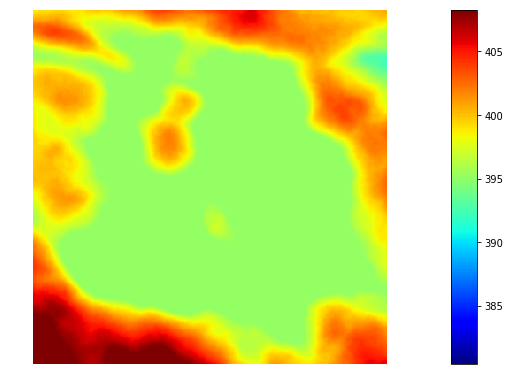

In [10]:
beau_filled    = rd.FillDepressions(beau, in_place=False)
beaufig_filled = rd.rdShow(beau_filled, ignore_colours=[0], axes=False, cmap='jet', vmin=beaufig['vmin'], vmax=beaufig['vmax'], figsize=(8,5.5))

We can visualize the difference between the two like so:

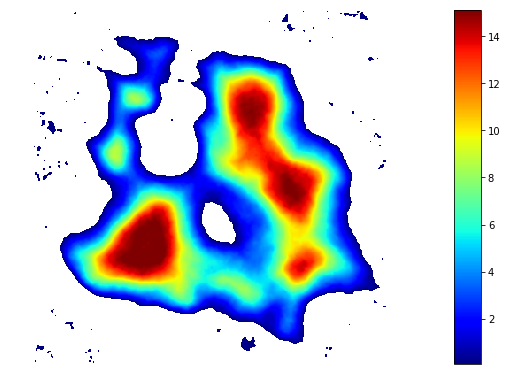

In [11]:
beau_diff    = beau_filled - beau
beaufig_diff = rd.rdShow(beau_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

#### Epsilon Filling

A downside of complete filling is that it replaces depressions with a perfectly flat region with no local gradients. One way to deal with this is to ensure that every cell in the region is raised some small amount, ε, above cells which are closer to a depression’s spill point.

This must be done carefully. In floating-point DEMs, the value ε is non-constant and must be chosen using the !`std::nextafter` function. If a depression is too large, the imposed gradient may result in the interior of the depression being raised above the surrounding landscape. Using double instead of float reduces the potential for problems at a cost of twice the space used. If a problem does arise, RichDEM provides a warning.

We can visualize the difference between the epsilon-filled DEM and the original DEM like so:

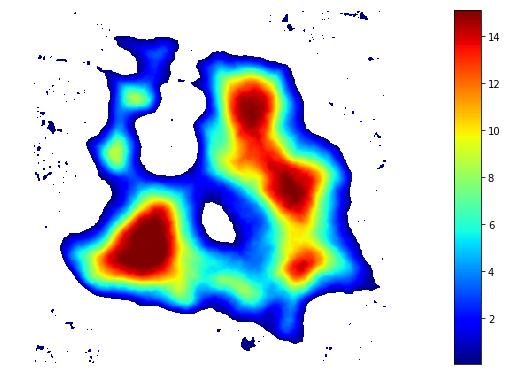

In [12]:
beau_epsilon         = rd.FillDepressions(beau, epsilon=True, in_place=False)
beau_eps_diff        = beau_epsilon - beau
beaufig_eps_diff     = rd.rdShow(beau_eps_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

We can visualize the difference between the epsilon-filled DEM and the completely-filled DEM as follows. Note that elevation increases with distance from the depression’s outlet: this is the effect of the epsilon.

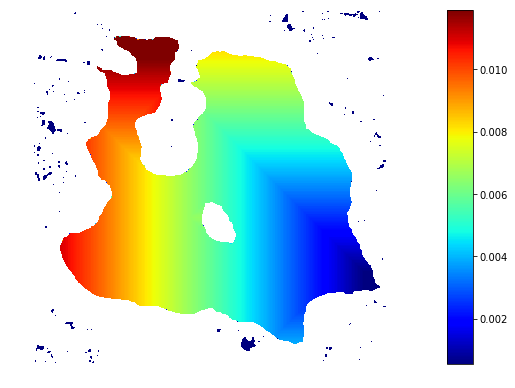

In [13]:
beau_diffeps_diff    = beau_epsilon - beau_filled
beaufig_diffeps_diff = rd.rdShow(beau_diffeps_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))